# FACEBOOK LEADS AND COMPAIGN ANALYSIS

### TO DO - Talk about dataset (Source, How it will be useful)
- Kaggle  
- analyze camapaigns with best recommmended changes to improve conversion rates across products 
       

# I. Getting the dataset
Importing pandas to read dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [3]:
df.shape

(1143, 15)

In this dataset, 1143 rows and 15 columns are present.

# II. Data preparation and cleaning
#### - Looking at some information about the data and data columns
#### - Create a new dataset with important columns which are necessary for analysis
#### - Fix any incorrect or missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

#### Dataset describes the columns as
**ad_id           :** Unique id for each ad.<br>
**reporting_start :** Starting date of each ad.<br>
**reporting_end  :** Ending date of each date.<br>
**compaign_id     :** An ID associated with each ad campaign.<br>
**fb_compain_id :** An ID associated with how Facebook tracks each campaign. <br>
**age           :** Age of the person to whom the ad is shown. <br>
**gender :** gender of the person to whom the add is shown. <br>
**interest 1,2,3 :** A code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile)<br>
**impressions :** the number of times the ad was shown.<br>
**clicks :** number of clicks on for that ad.<br>
**spent :** Amount paid by company to Facebook, to show that ad.<br>
**total_converison :** Total number of people who enquired about the product after seeing the ad.<br>
**approves_conversion :** Total number of people who bought the product after seeing the ad.<br>

In [5]:
df.dtypes.value_counts()

object     6
int64      5
float64    4
dtype: int64

Here in this dataset, we have 6 object type columns, 5 numerical columns ans 4 decimal type columns

Now we shall observe the unique value counts ahead


In [6]:
df.nunique()

ad_id                  1143
reporting_start          14
reporting_end            14
campaign_id               7
fb_campaign_id          490
age                      44
gender                   63
interest1                64
interest2               431
interest3               168
impressions            1126
clicks                   97
spent                   509
total_conversion         24
approved_conversion      15
dtype: int64

#### Looking for misisng values

In [7]:
df.isnull().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

we have 382 missing values in total_conversion and approves_conversion. 

 #### Let's find those rows

In [8]:
df[df.isnull().any(axis=1)]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
761,1121594,26/08/2017,26/08/2017,45-49,M,10,14,14,426500,72,128.279999,4,1.0,NaN,NaN
762,1121597,30/08/2017,30/08/2017,45-49,M,15,21,19,54237,7,10.780000,2,1.0,NaN,NaN
763,1121598,30/08/2017,30/08/2017,45-49,M,15,19,18,506916,89,133.699999,2,2.0,NaN,NaN
764,1121599,30/08/2017,30/08/2017,45-49,M,15,17,18,250960,42,64.880000,2,0.0,NaN,NaN
765,1121601,30/08/2017,30/08/2017,45-49,M,16,20,18,2286228,353,603.380002,16,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.0,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.0,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.0,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710001,8,2.0,NaN,NaN


Since, total_conversion and approved_conversion is necessary for our analysis, we can't ignore these columns so we will remove NaN rows.

In [9]:
df = df= df.dropna()

In [10]:
df.isna().sum()

ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

In [11]:
df.shape

(761, 15)

Up next, we are gonna try to detect the outliers in the dataset by looking in to the histograms of the numerical attributes.

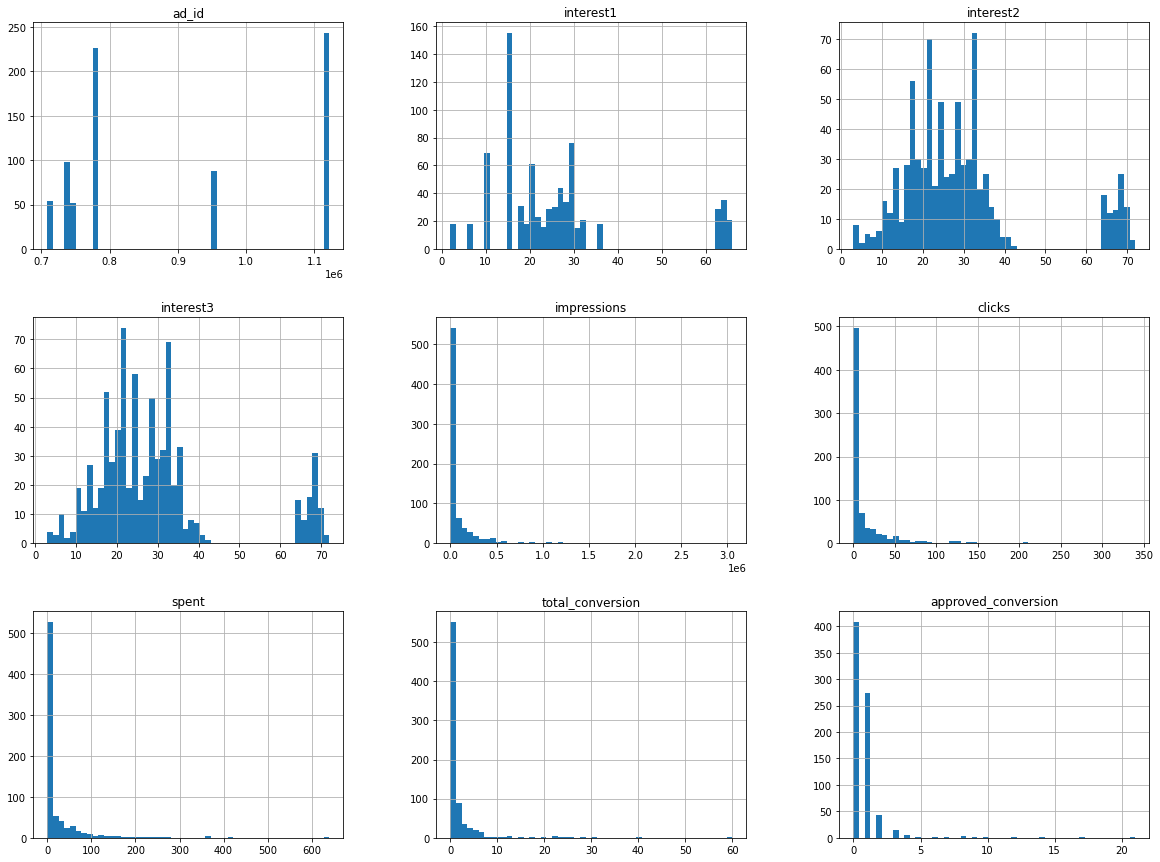

In [12]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

The values are resonable and lie within an expected range hence there are no outliers to connsider specifically

Now we are going to handle the duplicate entries in our data set.

Duplicated rows or records can now be dropped from the dataset, as this redundancy may cause inaccurate results and outcomes (an assumption on the dataset).

In [13]:
df[df.duplicated(subset = None, keep = False)]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion


So far, there are no duplicate values in our dataset.

**Data reduction:** Data reduction involves dropping the attribute ‘reporting_start’,'reporting_end', and 'fb_campaign_id' as we already have ad_id as our primary column to represent our each row .

In [14]:
df = df.drop(['reporting_start','reporting_end','fb_campaign_id'], axis=1)

#### Up next, we're going to observe some correlations ahead

A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values. Another reason is to prevent overfitting.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A positive correlation indicates that both features will change their values in the same direction, while a negative correlation indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

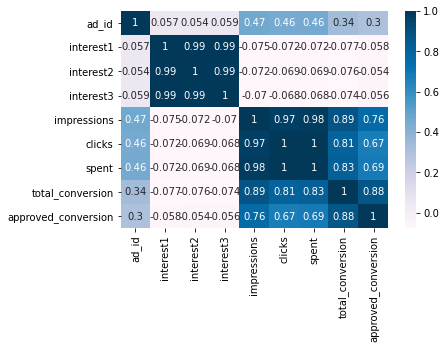

In [15]:
import seaborn as sns
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

##### we've now cleaned up our data and prepared for analysis. 


In [16]:
# display the number of entries, the number and names of the column attributes, the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 760
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                761 non-null    int64  
 1   campaign_id          761 non-null    object 
 2   age                  761 non-null    object 
 3   gender               761 non-null    object 
 4   interest1            761 non-null    int64  
 5   interest2            761 non-null    int64  
 6   interest3            761 non-null    int64  
 7   impressions          761 non-null    float64
 8   clicks               761 non-null    int64  
 9   spent                761 non-null    float64
 10  total_conversion     761 non-null    float64
 11  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 77.3+ KB


#### Let's take a look at sample of rows from the dataframe.

In [17]:
df.head()

,ad_id,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


# III.  ANALYSIS AND VISUALIZATION

#### Let's start with importing visualization libraries.

The Summary statistics:

In [18]:
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,7.610000e+02,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000
mean,8.956389e+05,25.473062,28.977661,28.984231,1.031716e+05,15.340342,25.782181,2.161629,0.768725
std,1.670937e+05,15.508898,15.607548,15.604816,2.462644e+05,32.715738,57.622334,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.480860e+05,16.000000,19.000000,19.000000,3.149000e+03,0.000000,0.000000,1.000000,0.000000
50%,7.811750e+05,22.000000,26.000000,25.000000,1.219300e+04,3.000000,3.580000,1.000000,0.000000
75%,1.121184e+06,29.000000,33.000000,33.000000,8.597000e+04,14.000000,23.210000,2.000000,1.000000
max,1.121593e+06,66.000000,72.000000,72.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [19]:
round(sum(df['total_conversion']), 1)

1645.0

In [20]:
round(sum(df['approved_conversion']), 1)

585.0

In [21]:
round(sum(df['spent']), 2)

19620.24

Firstly, **the total number of people who enquired about the product after seeing the ad is 1645 , 2 average for every ads. and minimum number of peoples are 0 and maximum is 60.** <br>
**The total number of people who bought the product after seeing the ad is 585 , with an average of 1 .** 

The company  spent the total amount of 19620.24, and 25.8 on average for each transaction. 

Now, we're gong to use kernel density curves for visualising the distributions of both total_conversion and approved_conversion in a form of continous probability density curve.

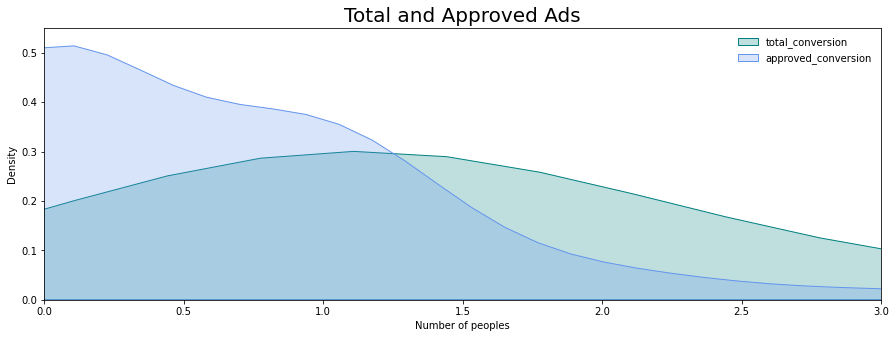

In [22]:
plt.figure(figsize=(15,5))
# plot spent and approved_converison for comparisons
sns.kdeplot(df['total_conversion'], color = 'Teal', label = 'total_conversion', shade = True)
sns.kdeplot(df['approved_conversion'], color = 'Cornflowerblue', label = 'approved_conversion' ,shade = True)
plt.xlim([0,3])
plt.ylim([0,0.55])
plt.xlabel('Number of peoples')
plt.ylabel('Density')
plt.title('Total and Approved Ads', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

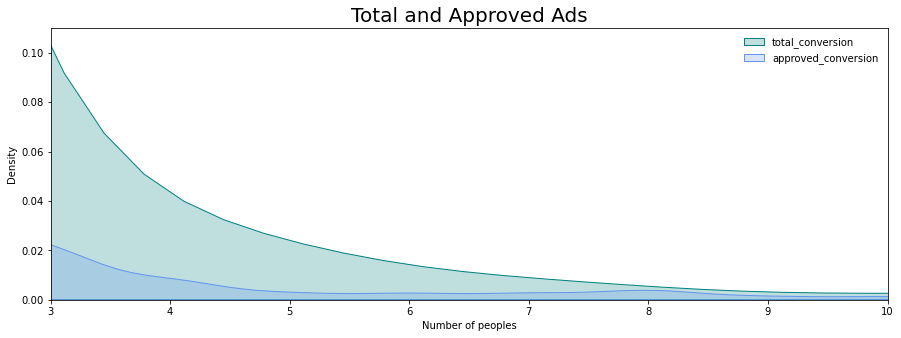

In [23]:
plt.figure(figsize=(15,5))
# plot spent and approved_converison for comparisons
sns.kdeplot(df['total_conversion'], color = 'Teal', label = 'total_conversion', shade = True)
sns.kdeplot(df['approved_conversion'], color = 'Cornflowerblue', label = 'approved_conversion' ,shade = True)
plt.xlim([3,10])
plt.ylim([0,0.11])
plt.xlabel('Number of peoples')
plt.ylabel('Density')
plt.title('Total and Approved Ads', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

In above plots, the approved_conversion values are mostly above than the sales. Which shows good business of the company. But total_approved above 1.5 are having decreased approved_conversion and they are the areas where the improvement is needed.

Now, we're going to use kernel density curves for visualising the distributions of interest1,interest2,interest3 and approved_conversion in a form of continous probability density curve.

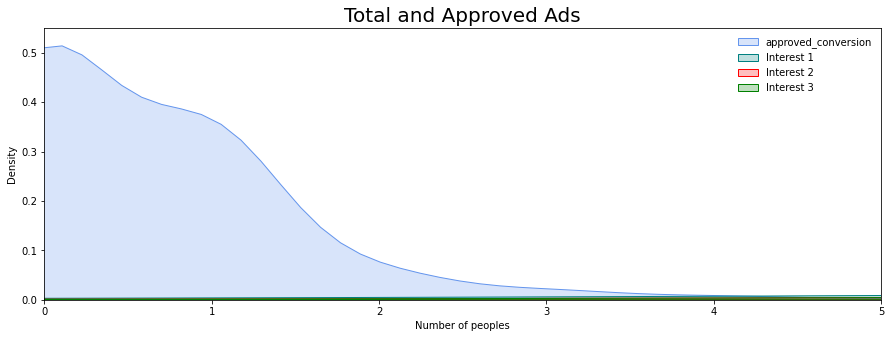

In [24]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['approved_conversion'], color = 'Cornflowerblue', label = 'approved_conversion' ,shade = True)
sns.kdeplot(df['interest1'], color = 'Teal', label = 'Interest 1', shade = True)
sns.kdeplot(df['interest2'], color = 'Red', label = 'Interest 2', shade = True)
sns.kdeplot(df['interest3'], color = 'Green', label = 'Interest 3', shade = True)
plt.xlim([0,5])
plt.ylim([0,0.55])
plt.xlabel('Number of peoples')
plt.ylabel('Density')
plt.title('Total and Approved Ads', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

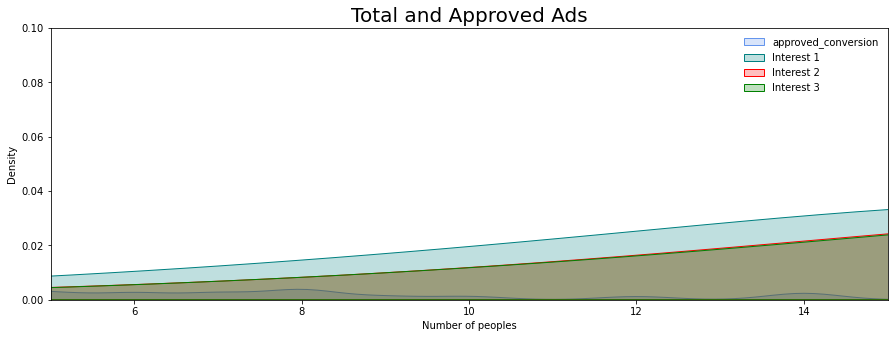

In [25]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['approved_conversion'], color = 'Cornflowerblue', label = 'approved_conversion' ,shade = True)
sns.kdeplot(df['interest1'], color = 'Teal', label = 'Interest 1', shade = True)
sns.kdeplot(df['interest2'], color = 'Red', label = 'Interest 2', shade = True)
sns.kdeplot(df['interest3'], color = 'Green', label = 'Interest 3', shade = True)
plt.xlim([5,15])
plt.ylim([0,0.1])
plt.xlabel('Number of peoples')
plt.ylabel('Density')
plt.title('Total and Approved Ads', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

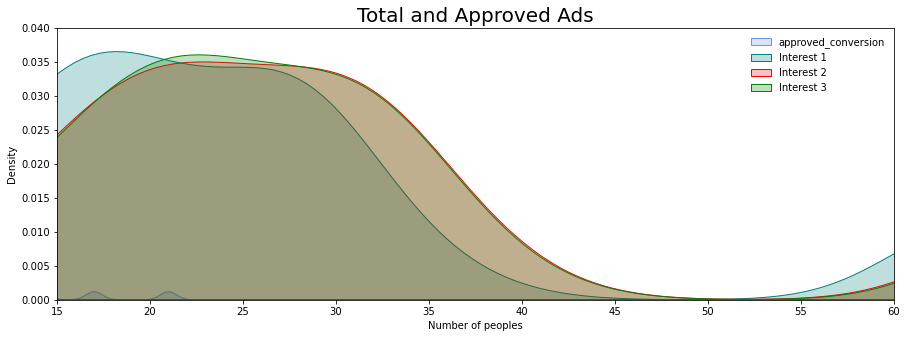

In [26]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['approved_conversion'], color = 'Cornflowerblue', label = 'approved_conversion' ,shade = True)
sns.kdeplot(df['interest1'], color = 'Teal', label = 'Interest 1', shade = True)
sns.kdeplot(df['interest2'], color = 'Red', label = 'Interest 2', shade = True)
sns.kdeplot(df['interest3'], color = 'Green', label = 'Interest 3', shade = True)
plt.xlim([15,60])
plt.ylim([0,0.04])
plt.xlabel('Number of peoples')
plt.ylabel('Density')
plt.title('Total and Approved Ads', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

In above plots, the approved_conversion values are mostly above when peoples interest are really into those ads , so company needs to remove those ads where peoples don't have any interest and have to show the kind of ads where peoples interest are really into it.

Let's plot countplot of age and gender

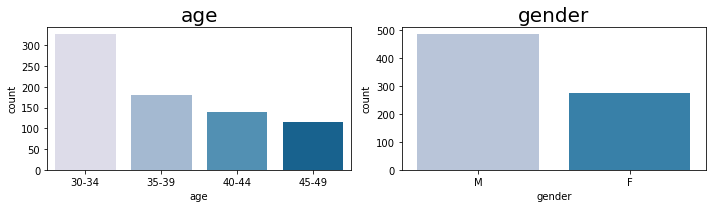

In [27]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10,3));
sns.countplot(df['age'], ax = axs[0], palette = 'PuBu')
sns.countplot(df['gender'], ax = axs[1], palette = 'PuBu')
axs[0].set_title('age', fontsize = 20)
axs[1].set_title('gender', fontsize = 20)
plt.tight_layout()

# IV. ANALYSING DATA

## Analyzing data on cost basis

##### Counting the number of each campaign_id

In [28]:
df.campaign_id.value_counts()

936     464
1178    243
916      54
Name: campaign_id, dtype: int64

Campaign_ID 916 is very less in number

#### Let's see the number of clicks on particular campaign_id

In [29]:
df.groupby(['campaign_id']).clicks.sum()

campaign_id
1178    9577
916      113
936     1984
Name: clicks, dtype: int64

Campaign_ID 1178 is getting high number of clicks.

#### Let's see the total amount spent on particular campaign_id

In [30]:
df.groupby(['campaign_id']).spent.sum()

campaign_id
1178    16577.159998
916       149.710001
936      2893.369999
Name: spent, dtype: float64

Very less amount is being spent on Campaign_ID 916 

##### Calculating the cost per click on each campaign_id

In [31]:
cam_id = [1178,916,936]
for i,j,id in zip(round(df.groupby(['campaign_id']).spent.sum(),2),df.groupby(['campaign_id']).clicks.sum(),cam_id):
    cost_per_click = float(i)/float(j)
    print("Cost per click of Campaign ID", id ," : ",round(cost_per_click,2))

Cost per click of Campaign ID 1178  :  1.73
Cost per click of Campaign ID 916  :  1.32
Cost per click of Campaign ID 936  :  1.46


Cost per click of Campaign_ID 916 is low as compard to other Campaign IDs

#### Let's see the total number of peoples enquired on particular campaign_id

In [32]:
df.groupby(['campaign_id']).total_conversion.sum()

campaign_id
1178    1050.0
916       58.0
936      537.0
Name: total_conversion, dtype: float64

High number of people of Campaign ID - 1178 enquired the product after seeing the ad.

##### Calculating the cost per total_conversion on each campaign_id

In [33]:
for i,j,id in zip(df.groupby(['campaign_id']).spent.sum(),df.groupby(['campaign_id']).total_conversion.sum(),cam_id):
    cost_per_click = float(i)/float(j)
    print("Cost per conversion of Campaign ID", id ," : ",round(cost_per_click,2))

Cost per conversion of Campaign ID 1178  :  15.79
Cost per conversion of Campaign ID 916  :  2.58
Cost per conversion of Campaign ID 936  :  5.39


Cost per conversion of Campaign_ID 916 is low as compard to other Campaign IDs

#### Let's see the total number of Ads_ID on particular campaign_id

In [34]:
df.groupby(['campaign_id']).ad_id.count()

campaign_id
1178    243
916      54
936     464
Name: ad_id, dtype: int64

Campaign ID of 916 is in very less number of peoples as compared to other Campaign IDs.

##### Calculating the cost per AD_ID on each campaign_id

In [35]:
for i,j,id in zip(df.groupby(['campaign_id']).spent.sum(),df.groupby(['campaign_id']).ad_id.count(),cam_id):
    cost_per_click = float(i)/float(j)
    print("Cost per conversion of Campaign ID", id ," : ",round(cost_per_click,2))

Cost per conversion of Campaign ID 1178  :  68.22
Cost per conversion of Campaign ID 916  :  2.77
Cost per conversion of Campaign ID 936  :  6.24


Again , Cost per AD_ID of Campaign_ID 916 is low as compard to other Campaign IDs

From the above analysis, ***campaign_id 916 is much efficient than other campaign_ids***

**As we saw earlier, the number of campaign_id 916 is very less in number and still its the best campaign_id so, If we increase the numbers of 916 id , company will get more profit.**

## Analyzing data on gender basis

##### Let see the number of peoples from each gender with their campaign id

In [36]:
df.groupby(['campaign_id','gender']).ad_id.count()

campaign_id  gender
1178         M         243
916          F          19
             M          35
936          F         256
             M         208
Name: ad_id, dtype: int64

Clearly males are more in number.

##### Let see the number of peoples from each gender with their campaign id who enquired the product through ads

In [37]:
df.groupby(['campaign_id','gender']).total_conversion.sum()

campaign_id  gender
1178         M         1050.0
916          F           20.0
             M           38.0
936          F          302.0
             M          235.0
Name: total_conversion, dtype: float64

**Males are more in number in campaign_id 1178 and 916 and less in number in campaign_id of 936 but we already saw that 916 is more efficient campaign_id. So, if we target on male alone, then we will get more profit.**

## Analyzing data on age basis

##### Let's see the total number of age group in each gender 

In [38]:
df[['gender','age']].value_counts()

gender  age  
M       30-34    219
        35-39    128
F       30-34    108
M       40-44     92
F       45-49     68
        35-39     52
        40-44     47
M       45-49     47
dtype: int64

Plotting piechart for the above table

Text(0.5, 1.0, 'Gender VS Age')

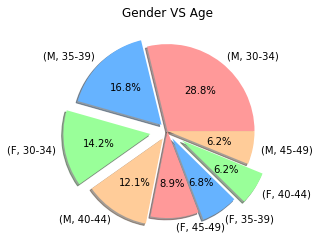

In [39]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
df[['gender','age']].value_counts().plot.pie(explode=[0,0.1,0.2,0.1,0,0.1,0.2,0],autopct='%1.1f%%',colors=colors,shadow=True)
plt.ylabel('')
plt.title('Gender VS Age')

**The above plot shows that most of the target audiance is between the age group of 30-34 for both males and females.**

##### Let see the number of peoples from each age group with their campaign id

In [40]:
df.groupby(['campaign_id','age']).ad_id.count()

campaign_id  age  
1178         30-34    102
             35-39     79
             40-44     58
             45-49      4
916          30-34     29
             35-39     12
             40-44      6
             45-49      7
936          30-34    196
             35-39     89
             40-44     75
             45-49    104
Name: ad_id, dtype: int64

Peoples age between 30-34 and 35 -39 are more in number in all the campaign_id

##### Let see the number of peoples from each age group with their campaign id who enquired the product through ads

In [41]:
df.groupby(['campaign_id','age']).total_conversion.sum()

campaign_id  age  
1178         30-34    632.0
             35-39    248.0
             40-44    145.0
             45-49     25.0
916          30-34     31.0
             35-39     13.0
             40-44      7.0
             45-49      7.0
936          30-34    227.0
             35-39     96.0
             40-44     83.0
             45-49    131.0
Name: total_conversion, dtype: float64

Again , Peoples age between 30-34 and 35-39 shown more interest in all the campaign_id.

**So. If we target more on peoples whose age are between 30-39 , company will get more profit.**

# V. RESULTS

1. As we saw earlier, the number of campaign_id 916 is very less in number and still its the best campaign_id so, If we increase the numbers of 916 id , company will get more profit.
2. Males are more in number in campaign_id 1178 and 916 and less in number in campaign_id of 936 but we already saw that 916 is more efficient campaign_id. So, if we target on male alone, then we will get more profit.
3. If we target more on peoples whose age are between 30-39 , company will get more profit.